### Title: Diabetes Prediction Using Machine Learning Algorithms

#### Objectives:
The primary goal of this project is to predict the likelihood of diabetes occurrence in patients based on their medical and demographic attributes. This project focuses on the following objectives:

1. Preprocess and analyze the provided dataset to prepare it for predictive modeling.
2. Apply and evaluate the performance of multiple supervised learning algorithms, including Random Forest, Logistic Regression, and K-Nearest Neighbors, to classify patients as diabetic (1) or non-diabetic (0).
3. Visualize the data and results to understand feature importance, relationships, and model performance.
4. Compare the results of the algorithms and provide insights and recommendations based on their performance metrics (accuracy, precision, recall, F1-score, etc.).

In [1]:
# Load necessary libraries
library(tidyverse)
library(caret)
library(ggplot2)
library(e1071)
library(randomForest)
library(corrplot)
library(pROC)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


corrplot 0.95 loaded

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The 

In [2]:
# Load the dataset
file_path = '/Users/damilare/Documents/Abas/datasets/diabetes.csv'
diabetes_data <- read.csv(file_path,  header = TRUE)

# View the structure of the data
str(diabetes_data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [3]:
# Display the first few rows
head(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [5]:
# Get the number of rows and columns
shape <- dim(diabetes_data)
cat("Number of rows:", shape[1], "\n")
cat("Number of columns:", shape[2], "\n")

Number of rows: 768 
Number of columns: 9 


In [7]:
# Check for missing values
colSums(is.na(diabetes_data))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

- There are no missing values, hence the data is clean.

### Data Splitting

- The dataset is splitted into 70% for the training sample and 30% for the test sample. 

In [9]:
# Split data into 70% training and 30% testing
set.seed(123)
trainIndex <- createDataPartition(diabetes_data$Outcome, p = 0.7, list = FALSE)
trainData <- diabetes_data[trainIndex, ]
testData <- diabetes_data[-trainIndex, ]


# Separate features (X) and target (Y) for training
train_features <- trainData[, -ncol(trainData)]  # Remove target column
train_target <- trainData$Outcome

# Separate features (X) for testing
test_features <- testData[, -ncol(testData)]  # Remove target column
test_target <- testData$Outcome  # Keep target column for evaluation


In [10]:
head(train_features)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
2,1,85,66,29,0,26.6,0.351,31
5,0,137,40,35,168,43.1,2.288,33
6,5,116,74,0,0,25.6,0.201,30
7,3,78,50,32,88,31.0,0.248,26
8,10,115,0,0,0,35.3,0.134,29
10,8,125,96,0,0,0.0,0.232,54


In [11]:
head(test_features)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,6,148,72,35,0,33.6,0.627,50
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
9,2,197,70,45,543,30.5,0.158,53
15,5,166,72,19,175,25.8,0.587,51
17,0,118,84,47,230,45.8,0.551,31


In [12]:
head(train_target)

[1] 0 1 0 1 0 1

### Plots

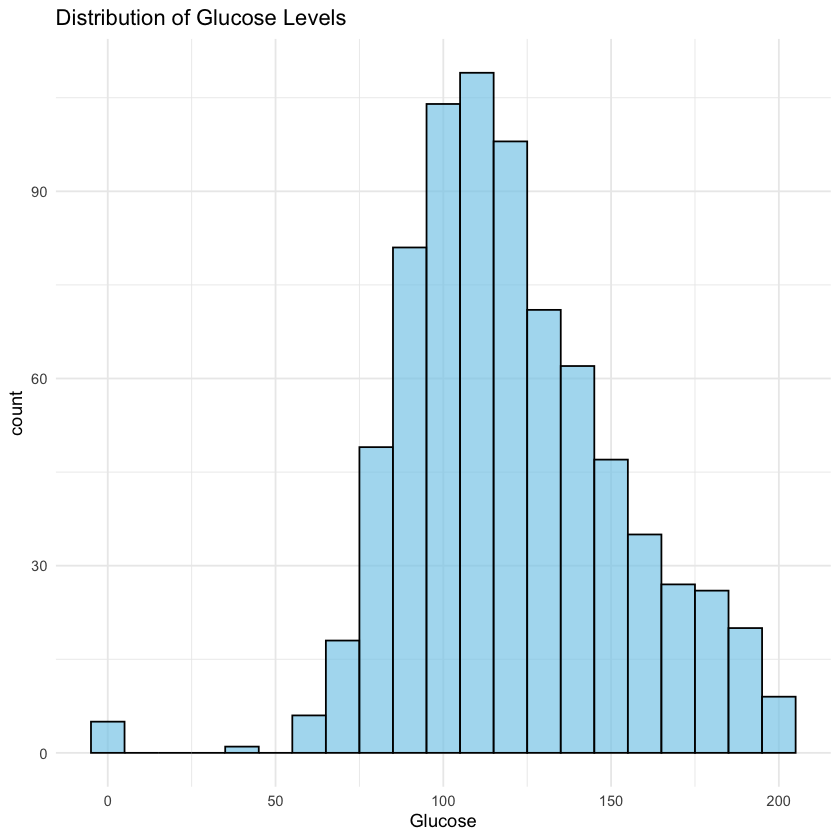

In [27]:
# Plot histograms for numerical features
ggplot(diabetes_data, aes(x = Glucose)) + 
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black", alpha = 0.7) + 
  theme_minimal() + 
  ggtitle("Distribution of Glucose Levels")

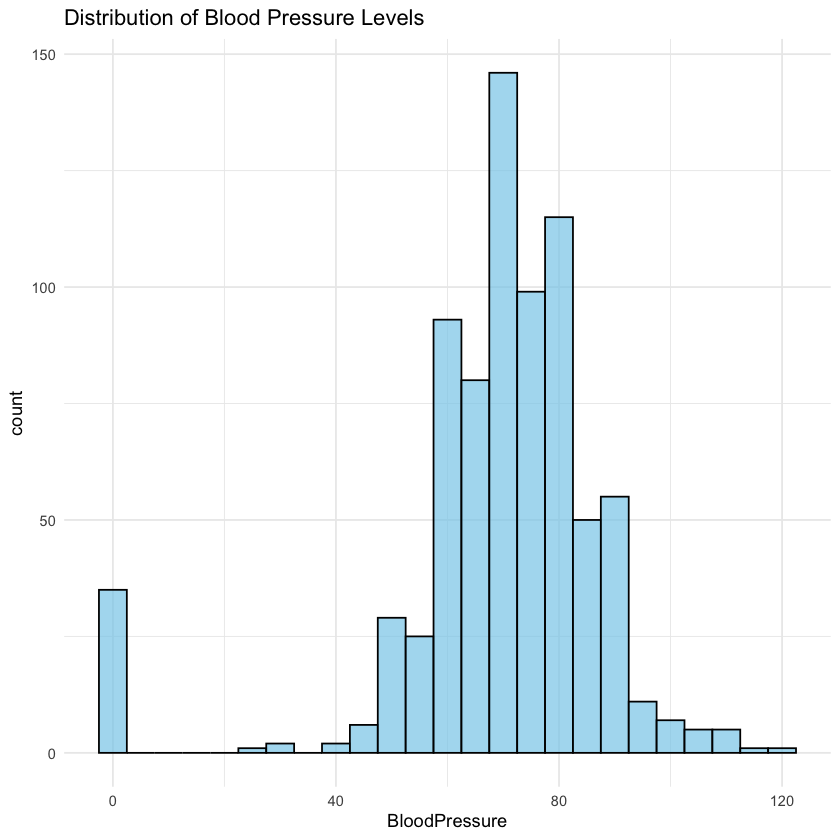

In [28]:
ggplot(diabetes_data, aes(x = BloodPressure)) + 
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black", alpha = 0.7) + 
  theme_minimal() + 
  ggtitle("Distribution of Blood Pressure Levels")

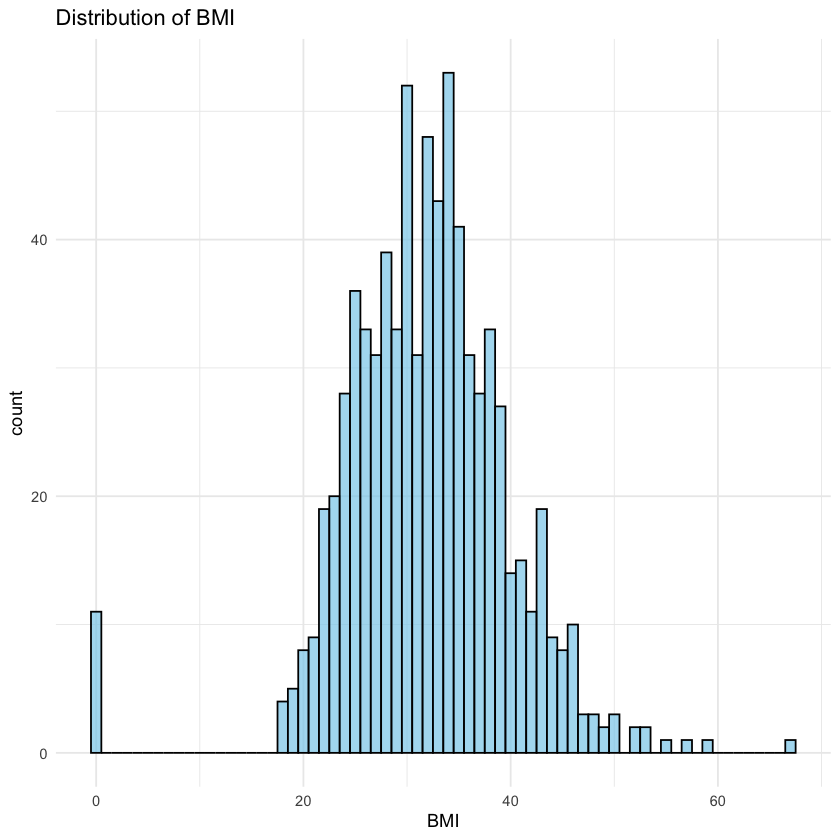

In [29]:
ggplot(diabetes_data, aes(x = BMI)) + 
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) + 
  theme_minimal() + 
  ggtitle("Distribution of BMI")

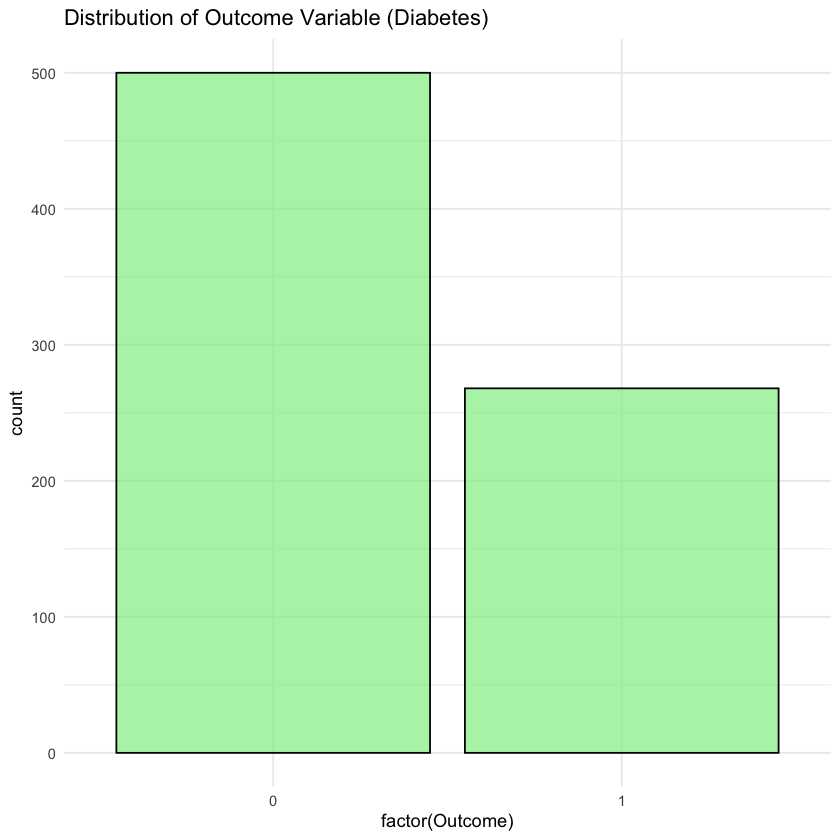

In [30]:
# Bar plot for Outcome (target variable)
ggplot(diabetes_data, aes(x = factor(Outcome))) + 
  geom_bar(fill = "lightgreen", color = "black", alpha = 0.7) + 
  theme_minimal() + 
  ggtitle("Distribution of Outcome Variable (Diabetes)")


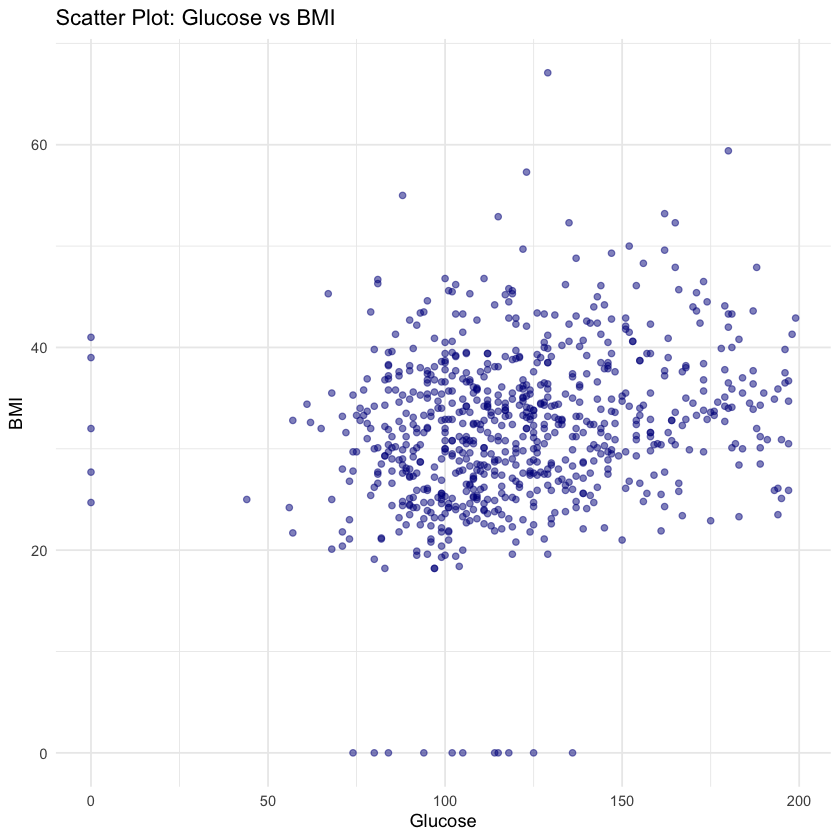

In [31]:
# Scatter plot between Glucose and BMI
ggplot(diabetes_data, aes(x = Glucose, y = BMI)) + 
  geom_point(color = "darkblue", alpha = 0.5) + 
  theme_minimal() + 
  ggtitle("Scatter Plot: Glucose vs BMI")

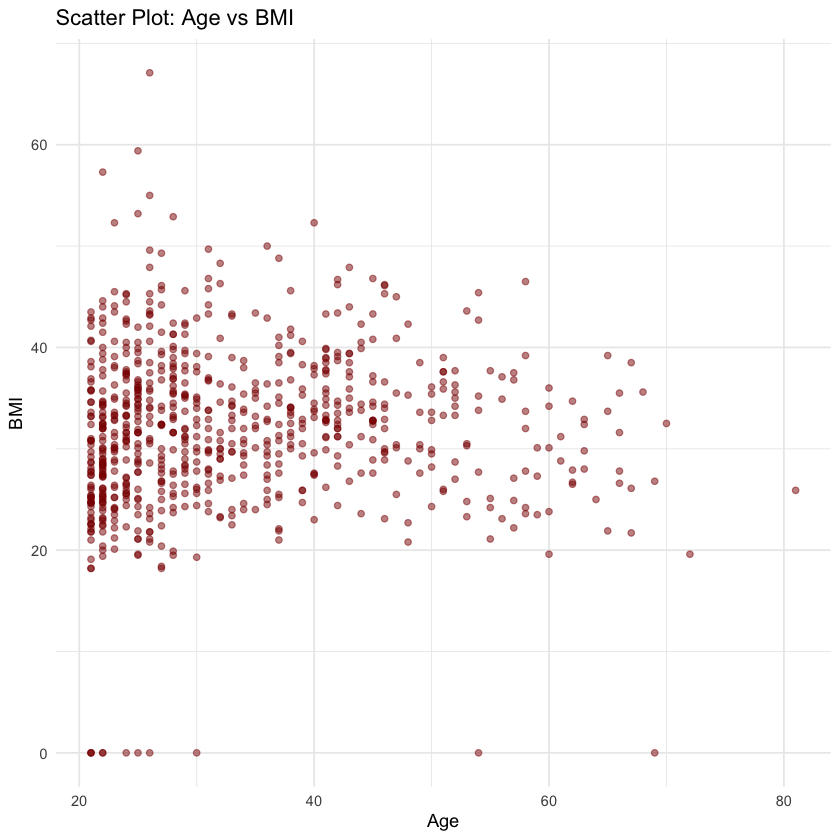

In [32]:
# Scatter plot between Age and BMI
ggplot(diabetes_data, aes(x = Age, y = BMI)) + 
  geom_point(color = "darkred", alpha = 0.5) + 
  theme_minimal() + 
  ggtitle("Scatter Plot: Age vs BMI")

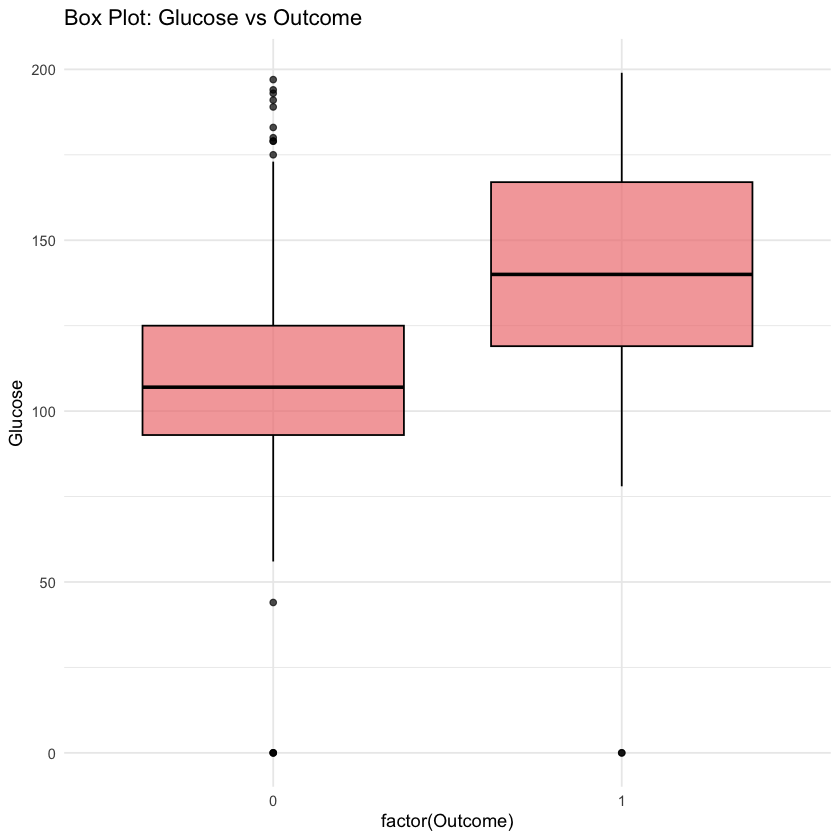

In [34]:
# Box plot for Glucose vs Outcome
ggplot(diabetes_data, aes(x = factor(Outcome), y = Glucose)) + 
  geom_boxplot(fill = "lightcoral", color = "black", alpha = 0.7) + 
  theme_minimal() + 
  ggtitle("Box Plot: Glucose vs Outcome")

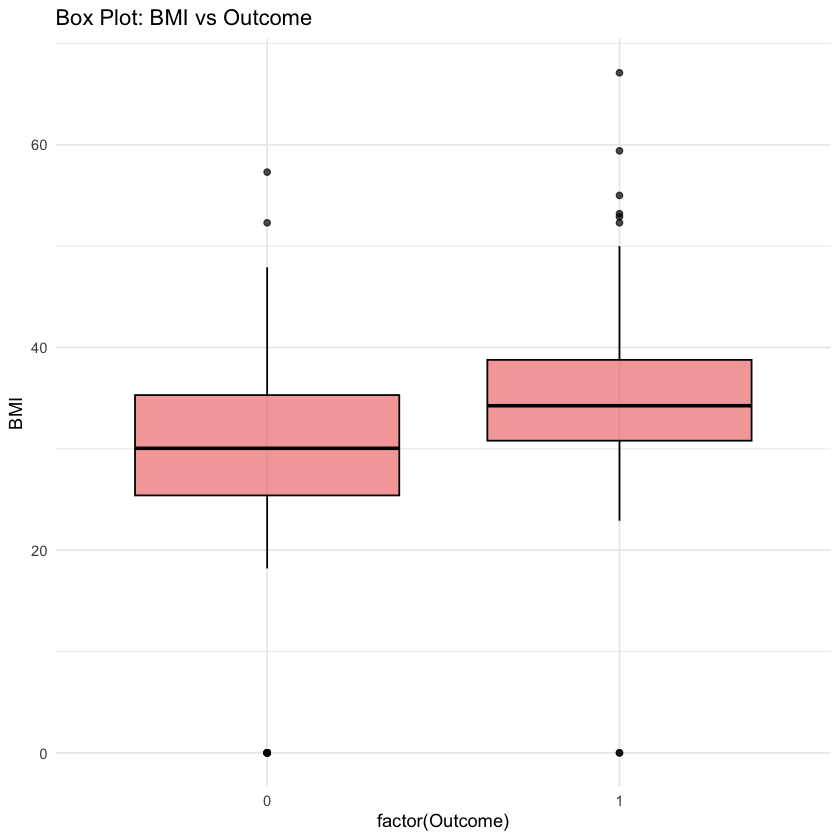

In [35]:
# Box plot for BMI vs Outcome
ggplot(diabetes_data, aes(x = factor(Outcome), y = BMI)) + 
  geom_boxplot(fill = "lightcoral", color = "black", alpha = 0.7) + 
  theme_minimal() + 
  ggtitle("Box Plot: BMI vs Outcome")


### Algorithms

1. Random Forest
2. Logistic Regression
3. KNN

In [13]:
# Logistic Regression Model
logistic_model <- glm(Outcome ~ ., data = trainData, family = binomial)

In [14]:
# Make predictions on the test set
logistic_probabilities <- predict(logistic_model, test_features, type = "response")

In [ ]:
# Convert probabilities to binary outcomes (threshold = 0.5)
logistic_predictions <- ifelse(logistic_probabilities > 0.5, 1, 0)

In [15]:
# Convert probabilities to binary outcomes (threshold = 0.5)
logistic_predictions <- ifelse(logistic_probabilities > 0.5, 1, 0)

# Evaluate the Logistic Regression model
logistic_conf_matrix <- confusionMatrix(as.factor(logistic_predictions), as.factor(test_target))
print(logistic_conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 137  36
         1  12  45
                                         
               Accuracy : 0.7913         
                 95% CI : (0.733, 0.8419)
    No Information Rate : 0.6478         
    P-Value [Acc > NIR] : 1.521e-06      
                                         
                  Kappa : 0.5095         
                                         
 Mcnemar's Test P-Value : 0.0009009      
                                         
            Sensitivity : 0.9195         
            Specificity : 0.5556         
         Pos Pred Value : 0.7919         
         Neg Pred Value : 0.7895         
             Prevalence : 0.6478         
         Detection Rate : 0.5957         
   Detection Prevalence : 0.7522         
      Balanced Accuracy : 0.7375         
                                         
       'Positive' Class : 0              
                                         


In [16]:
# Train Random Forest Model
rf_model <- randomForest(train_features, as.factor(train_target))

# Check model summary
print(rf_model)


Call:
 randomForest(x = train_features, y = as.factor(train_target)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.35%
Confusion matrix:
    0   1 class.error
0 301  50   0.1424501
1  81 106   0.4331551


In [17]:
# Predict on Test Data
predictions <- predict(rf_model, test_features)

In [18]:
# Model Evaluation: Confusion Matrix
conf_matrix <- confusionMatrix(as.factor(predictions), as.factor(test_target))
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 125  35
         1  24  46
                                          
               Accuracy : 0.7435          
                 95% CI : (0.6819, 0.7986)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.001207        
                                          
                  Kappa : 0.4198          
                                          
 Mcnemar's Test P-Value : 0.192954        
                                          
            Sensitivity : 0.8389          
            Specificity : 0.5679          
         Pos Pred Value : 0.7812          
         Neg Pred Value : 0.6571          
             Prevalence : 0.6478          
         Detection Rate : 0.5435          
   Detection Prevalence : 0.6957          
      Balanced Accuracy : 0.7034          
                                          
       'Positive' Class : 0               
                              

In [23]:
# KNN Model (from the class library)
library(class)

In [24]:
# Normalize the features
train_features_normalized <- scale(train_features)
test_features_normalized <- scale(test_features)

In [25]:
# Apply KNN algorithm
knn_predictions <- knn(train = train_features_normalized, 
                       test = test_features_normalized, 
                       cl = train_target, 
                       k = 5)

In [26]:
# Evaluate the model
conf_matrix_knn <- confusionMatrix(as.factor(knn_predictions), as.factor(test_target))
print(conf_matrix_knn)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  36
         1  21  45
                                          
               Accuracy : 0.7522          
                 95% CI : (0.6912, 0.8066)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.0004401       
                                          
                  Kappa : 0.4329          
                                          
 Mcnemar's Test P-Value : 0.0636898       
                                          
            Sensitivity : 0.8591          
            Specificity : 0.5556          
         Pos Pred Value : 0.7805          
         Neg Pred Value : 0.6818          
             Prevalence : 0.6478          
         Detection Rate : 0.5565          
   Detection Prevalence : 0.7130          
      Balanced Accuracy : 0.7073          
                                          
       'Positive' Class : 0               
                              

### Insigts and Conclusion

In this analysis, we applied three machine learning algorithms—Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN)—to predict diabetes outcomes based on health-related variables. The following key points summarize the findings:

1. The Logistic Regression achieved the highest accuracy (79.13%) and the best sensitivity (91.95%), indicating its ability to correctly identify diabetic patients, but it showed moderate specificity (55.56%).

2. K-Nearest Neighbors showed a reasonable performance with an accuracy of 75.22%, but its specificity was the lowest (55.56%) among the models. However, it had the highest sensitivity (85.91%).

3. The Random Forest had an accuracy of 74.35% and was comparable to KNN but slightly less sensitive (83.89%).